In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv('iris.csv')
print(data.head())
data.drop('Id', axis = 1, inplace=True )
print("data.isnull(): \n", data.isnull().sum())
print("data.isna(): \n",data.isna().sum())
print("\ntypy danych: \n", data.dtypes)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
data.isnull(): 
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
data.isna(): 
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

typy danych: 
 SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

one_hot_encoder = OneHotEncoder(sparse_output=False)
encoded_data = one_hot_encoder.fit_transform(data[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, columns=one_hot_encoder.get_feature_names_out(categorical_columns))

data = pd.concat([data.drop(categorical_columns, axis=1), encoded_df], axis=1)
print(data.head())





   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0            5.1           3.5            1.4           0.2   
1            4.9           3.0            1.4           0.2   
2            4.7           3.2            1.3           0.2   
3            4.6           3.1            1.5           0.2   
4            5.0           3.6            1.4           0.2   

   Species_Iris-setosa  Species_Iris-versicolor  Species_Iris-virginica  
0                  1.0                      0.0                     0.0  
1                  1.0                      0.0                     0.0  
2                  1.0                      0.0                     0.0  
3                  1.0                      0.0                     0.0  
4                  1.0                      0.0                     0.0  


In [ ]:
x1 = data.iloc[:,[2,3]]
x2 = data.iloc[:,[0,2]]
x3 = data.iloc[:,[1,3]]

In [ ]:
from sklearn.cluster import KMeans

wcss1 = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x1)
    wcss1.append(kmeans.inertia_)

wcss2 = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x2)
    wcss2.append(kmeans.inertia_)

wcss3 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x3)
    wcss3.append(kmeans.inertia_)




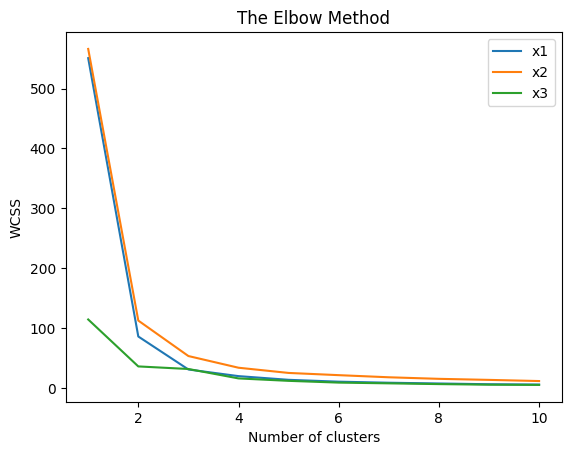

In [ ]:
from matplotlib import pyplot as plt

plt.plot(range(1, 11), wcss1, label='x1')
plt.plot(range(1, 11), wcss2, label='x2')
plt.plot(range(1, 11), wcss3, label='x3')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()

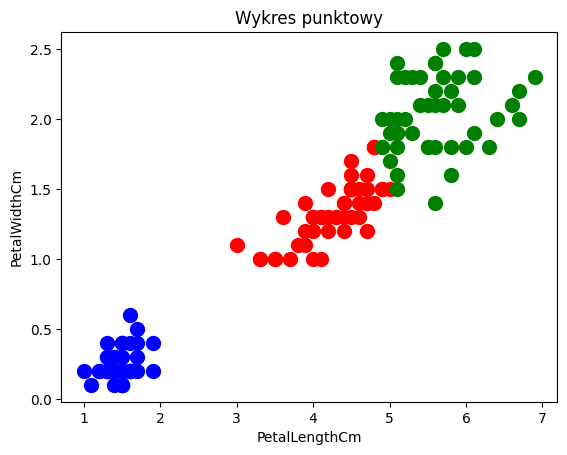

In [ ]:
kmeans1 = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans2 = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans3 = KMeans(n_clusters=3, init='k-means++', random_state=42)

y1 = kmeans1.fit_predict(x1)
y2 = kmeans2.fit_predict(x2)
y3 = kmeans3.fit_predict(x3)

#right now i need 3 scatters that shows the results

plt.scatter(x1.loc[y1 == 0, x1.columns[0]], x1.loc[y1==0, x1.columns[1]], s = 100, c = "red")
plt.scatter(x1.loc[y1 == 1, x1.columns[0]], x1.loc[y1==1, x1.columns[1]], s = 100, c = "blue")
plt.scatter(x1.loc[y1 == 2, x1.columns[0]], x1.loc[y1==2, x1.columns[1]], s = 100, c = "green")

plt.xlabel(x1.columns[0])
plt.ylabel(x1.columns[1])
plt.title('Wykres punktowy')
plt.show()


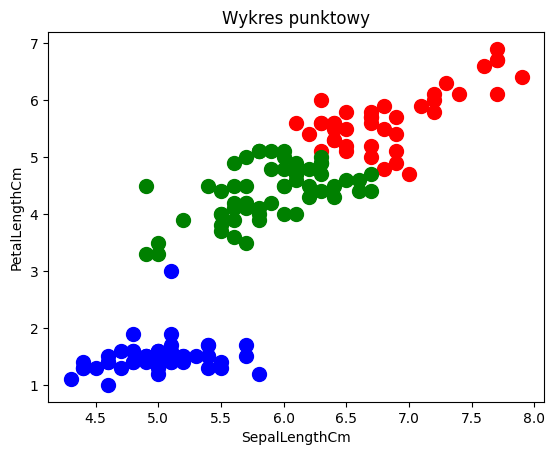

In [ ]:
plt.scatter(x2.loc[y2 == 0, x2.columns[0]], x2.loc[y2==0, x2.columns[1]], s = 100, c = "red")
plt.scatter(x2.loc[y2 == 1, x2.columns[0]], x2.loc[y2==1, x2.columns[1]], s = 100, c = "blue")
plt.scatter(x2.loc[y2 == 2, x2.columns[0]], x2.loc[y2==2, x2.columns[1]], s = 100, c = "green")

plt.xlabel(x2.columns[0])
plt.ylabel(x2.columns[1])
plt.title('Wykres punktowy')
plt.show()

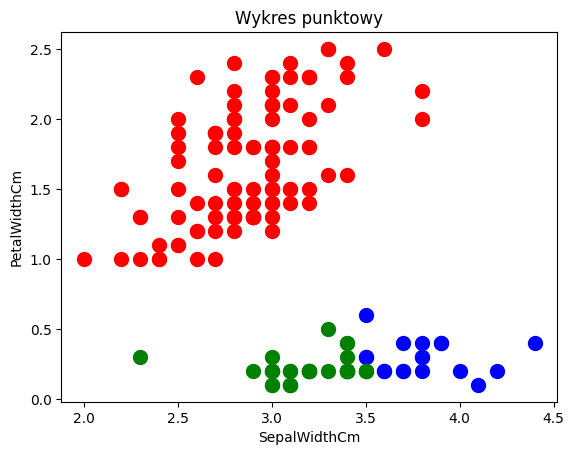

In [ ]:
plt.scatter(x3.loc[y3 == 0, x3.columns[0]], x3.loc[y3==0, x3.columns[1]], s = 100, c = "red")
plt.scatter(x3.loc[y3 == 1, x3.columns[0]], x3.loc[y3==1, x3.columns[1]], s = 100, c = "blue")
plt.scatter(x3.loc[y3 == 2, x3.columns[0]], x3.loc[y3==2, x3.columns[1]], s = 100, c = "green")

plt.xlabel(x3.columns[0])
plt.ylabel(x3.columns[1])
plt.title('Wykres punktowy')
plt.show()